# Artificial Intelligence Nanodegree

## Convolutional Neural Networks: Notebook 1

---

In this notebook, we train a multilayer perceptron to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


### 2.  Break Dataset into Training, Testing, and Validation Sets

In [2]:
from keras.utils import np_utils

# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print number of training, validation, and test images
print('Number of Training Images:', len(X_train))
print('Number of Validation Images:', len(X_valid))
print('Number of Test Images:', len(X_test))

Number of Training Images: 55000
Number of Validation Images: 5000
Number of Test Images: 10000


### 3. Visualize the First Six Training Images

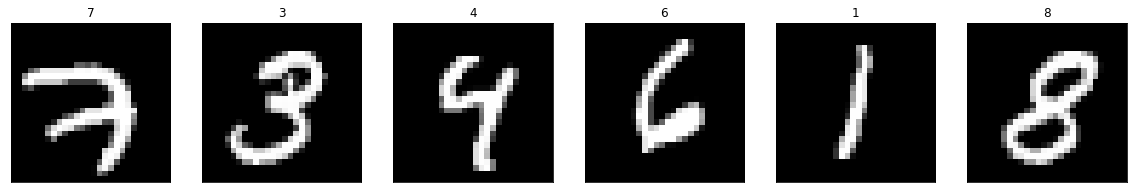

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 4. View an Image in More Detail

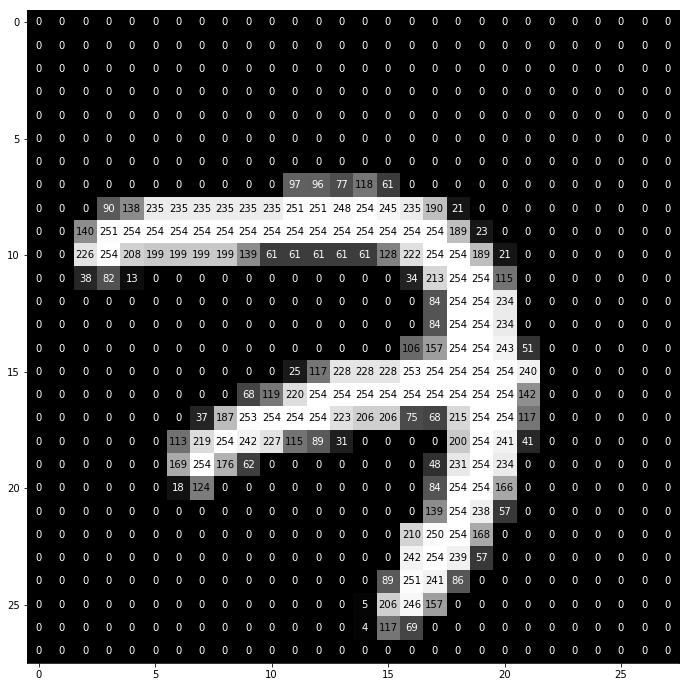

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 5. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 
X_valid = X_valid.astype('float32')/255

### 6. Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_valid = np_utils.to_categorical(y_valid, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[7 3 4 6 1 8 1 0 9 8]
One-hot labels:
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


### 7. Define the Model Architecture

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### 8. Compile the Model

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 9. Train the Model

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s - loss: 0.2564 - acc: 0.9220 - val_loss: 0.1041 - val_acc: 0.9696
Epoch 2/10
55000/55000 [==============================] - 4s - loss: 0.1079 - acc: 0.9668 - val_loss: 0.1008 - val_acc: 0.9686
Epoch 3/10
55000/55000 [==============================] - 5s - loss: 0.0781 - acc: 0.9758 - val_loss: 0.0769 - val_acc: 0.9790
Epoch 4/10
55000/55000 [==============================] - 5s - loss: 0.0625 - acc: 0.9808 - val_loss: 0.0808 - val_acc: 0.9782
Epoch 5/10
55000/55000 [==============================] - 5s - loss: 0.0503 - acc: 0.9850 - val_loss: 0.0771 - val_acc: 0.9792
Epoch 6/10
55000/55000 [==============================] - 5s - loss: 0.0460 - acc: 0.9866 - val_loss: 0.0772 - val_acc: 0.9802
Epoch 7/10
55000/55000 [==============================] - 6s - loss: 0.0394 - acc: 0.9886 - val_loss: 0.0760 - val_acc: 0.9808
Epoch 8/10
55000/55000 [==============================] - 6s -

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [10]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [11]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.2700%
